In [1]:
# Import the relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, \
recall_score, precision_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import statsmodels.api as sm
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import functions notebook and load data set here
import sys
sys.path.append("../")
from Modeling_functions import *

In [3]:
df=pd.read_csv('../data/Season_2020.csv')

In [4]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df2=pd.read_csv('../data/Playoffs_2020.csv').drop('Unnamed: 0',axis=1)

Find and eliminate NaNs

In [6]:
df=df.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [7]:
df2=df2.drop(['H_win_probability_subtracted','A_win_probability_subtracted','A_Opp_win_probability_subtracted',
         'H_Opp_win_probability_subtracted'],axis=1)

In [8]:
df.home_win.value_counts(normalize=True)

1    0.522277
0    0.477723
Name: home_win, dtype: float64

In [9]:
df2.home_win.value_counts(normalize=True)

0    0.515152
1    0.484848
Name: home_win, dtype: float64

In [10]:
df2.drop_duplicates(inplace=True)
df2

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,TBR,31.950000,3.950000,6.750000,3.850000,3.657500,3.150000,11.000000,35.650000,0.206650,...,10.000000,11.500000,4.500000,0.0,66.500000,2.000000,0.000000,0.339500,3.000000,1
1,CLE,35.500000,6.000000,9.000000,6.000000,6.000000,4.000000,12.500000,40.000000,0.253500,...,10.714286,12.142857,5.142857,0.0,45.000000,2.857143,0.571429,-0.144714,-1.985714,0
2,OAK,32.428571,4.857143,7.714286,4.571429,4.428571,3.142857,7.714286,36.428571,0.233714,...,8.666667,15.000000,7.666667,0.0,49.333333,3.333333,0.666667,0.086000,0.933333,0
3,MIN,29.500000,1.000000,3.500000,1.000000,1.000000,5.000000,7.000000,34.500000,0.118000,...,10.076923,12.230769,3.692308,0.0,49.538462,2.846154,0.769231,-0.055615,-0.169231,0
4,CHC,31.000000,0.500000,4.500000,0.500000,0.500000,2.500000,8.000000,35.500000,0.145000,...,8.800000,15.200000,6.000000,0.0,58.000000,0.800000,0.000000,0.147800,2.500000,0
5,SDP,33.500000,4.666667,8.166667,4.333333,4.438333,4.000000,9.500000,38.500000,0.237833,...,11.666667,14.666667,6.666667,0.0,34.333333,3.000000,0.666667,-0.006000,-0.733333,0
6,ATL,34.583333,4.750000,8.250000,4.666667,4.550000,3.583333,10.583333,38.833333,0.236000,...,8.500000,12.500000,6.000000,0.0,72.500000,2.500000,0.000000,0.989000,6.400000,1
7,LAD,33.444444,5.611111,8.500000,5.388889,5.743889,4.611111,9.277778,38.722222,0.245444,...,8.000000,12.500000,4.500000,0.0,71.000000,0.000000,0.000000,0.455500,3.900000,1
8,OAK,32.428571,4.857143,7.714286,4.571429,4.428571,3.142857,7.714286,36.428571,0.233714,...,8.666667,15.000000,7.666667,0.0,49.333333,3.333333,0.666667,0.086000,0.933333,1
9,SDP,33.500000,4.666667,8.166667,4.333333,4.438333,4.000000,9.500000,38.500000,0.237833,...,11.666667,14.666667,6.666667,0.0,34.333333,3.000000,0.666667,-0.006000,-0.733333,1


In [11]:
df.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,NYM,33.683333,4.850000,9.116667,4.70000,4.760500,3.366667,8.350000,38.033333,0.263500,...,11.416667,13.866667,6.883333,0.0,50.000000,1.833333,0.666667,-0.042900,-1.010000,1
1,TBR,33.016667,4.750000,7.833333,4.50000,4.548667,4.033333,10.166667,37.716667,0.232217,...,11.266667,13.900000,6.783333,0.0,49.100000,2.000000,0.750000,-0.044417,-0.423333,0
2,CHW,34.116667,5.100000,8.900000,4.90000,4.962500,2.983333,9.516667,37.783333,0.253000,...,9.850000,13.600000,6.933333,0.0,48.916667,1.593220,0.491525,0.029217,0.210000,0
3,OAK,31.816667,4.683333,7.200000,4.50000,4.827000,4.000000,8.783333,36.733333,0.223967,...,10.150000,14.983333,7.200000,0.0,46.750000,1.610169,0.372881,0.031567,0.041667,1
4,LAD,33.983051,5.779661,8.661017,5.40678,5.466610,3.779661,7.881356,38.525424,0.252119,...,10.152542,15.186441,7.542373,0.0,48.050847,1.689655,0.603448,-0.026932,-0.352542,1


In [43]:
#for col in X_train.columns:
    #print(col)

In [10]:
zero_importance_list=['H_runs','H_slugging_percentage','H_on_base_plus','H_base_out_runs_added','H_putouts',
                     'H_Opp_on_base_percentage','A_batting_average','A_win_probability_for_offensive_player',
                     'A_putouts']

In [11]:
tiny_importance_list=['H_at_bats','H_win_probability_added','H_fly_balls']

In [16]:
df2.head()

,H_name,H_at_bats,H_runs,H_hits,H_rbi,H_earned_runs,H_bases_on_balls,H_strikeouts,H_plate_appearances,H_batting_average,...,A_Opp_grounded_balls,A_Opp_fly_balls,A_Opp_line_drives,A_Opp_unknown_bat_type,A_Opp_game_score,A_Opp_inherited_runners,A_Opp_inherited_score,A_Opp_win_probability_by_pitcher,A_Opp_base_out_runs_saved,home_win
0,TBR,31.950000,3.950000,6.750000,3.850000,3.657500,3.150000,11.000000,35.650000,0.206650,...,10.000000,11.500000,4.500000,0.0,66.500000,2.000000,0.000000,0.339500,3.000000,1
1,CLE,35.500000,6.000000,9.000000,6.000000,6.000000,4.000000,12.500000,40.000000,0.253500,...,10.714286,12.142857,5.142857,0.0,45.000000,2.857143,0.571429,-0.144714,-1.985714,0
2,OAK,32.428571,4.857143,7.714286,4.571429,4.428571,3.142857,7.714286,36.428571,0.233714,...,8.666667,15.000000,7.666667,0.0,49.333333,3.333333,0.666667,0.086000,0.933333,0
3,MIN,29.500000,1.000000,3.500000,1.000000,1.000000,5.000000,7.000000,34.500000,0.118000,...,10.076923,12.230769,3.692308,0.0,49.538462,2.846154,0.769231,-0.055615,-0.169231,0
4,CHC,31.000000,0.500000,4.500000,0.500000,0.500000,2.500000,8.000000,35.500000,0.145000,...,8.800000,15.200000,6.000000,0.0,58.000000,0.800000,0.000000,0.147800,2.500000,0


In [12]:
def data_preprocessing(df, df2):
    X_train = df.drop(['home_win','H_name','A_name'], axis=1)
    X_test = df2.drop(['home_win','H_name','A_name'], axis=1)
    y_train = df.home_win
    y_test= df2.home_win
    
    ss = StandardScaler()
    X_train_scaled = ss.fit_transform(X_train)
    X_test_scaled = ss.transform(X_test)
    
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled,y_train,y_test

In [13]:
X_train_scaled,X_test_scaled,y_train,y_test=data_preprocessing(df,df2)

In [52]:
# X_test_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [22]:
# X_train_scaled.drop(['H_Opp_inherited_score','H_Opp_game_score','H_Opp_unknown_bat_type',
#                     'H_Opp_inherited_runners'],axis=1,inplace=True)

In [53]:
zero_imp_train=X_train_scaled.drop(zero_importance_list,axis=1)
zero_imp_test=X_test_scaled.drop(zero_importance_list,axis=1)

## Feature Selection

In [71]:
# pca=PCA(n_components=0.7)
# train_pca=pca.fit_transform(X_train_scaled)
# test_pca=pca.transform(X_test_scaled)

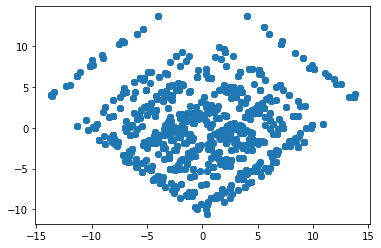

In [51]:
#plt.scatter(train_pca[:,0], train_pca[:,1]);

In [14]:
feats= feature_select(X_train_scaled,y_train,LogisticRegression,min_features=10)

In [17]:
X_train_best_log = X_train_scaled[feats]
X_test_best_log = X_test_scaled[feats]

# Logistic Regression

Penalty: l1
Solver: liblinear
Mean Cross-Val Score: 0.5271913580246913
Train Mean Accuracy: 0.556930693069307
Test Mean Accuracy: 0.6363636363636364
Recall Score: 0.875
Precision Score: 0.5833333333333334
F1 Score: 0.7000000000000001


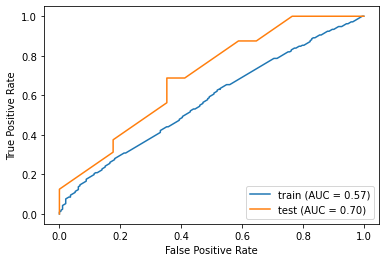

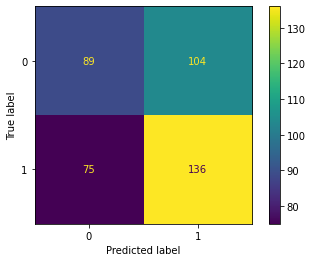

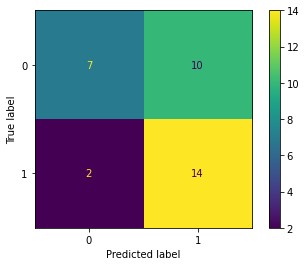

In [18]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [19]:
def new_acc(probabilities):
    class_list2=[]
    for log in probabilities:
        if log[0]<.40:
            class_list2.append(1)
        elif log[0]>.60:
            class_list2.append(0)
        else:
            class_list2.append(3)
    y_pred_class=pd.DataFrame(class_list2)
    y_pred_class.reset_index(inplace=True)
    y_test_df=pd.DataFrame(y_test)
    y_test_df.reset_index(inplace=True)
    comb=pd.concat([y_test_df,y_pred_class],axis=1)
    comb.drop(['index','index'],axis=1,inplace=True)
    comb['pred']=comb[0]
    comb.drop([0],axis=1,inplace=True)
    comb.drop(comb[comb['pred'] == 3].index, inplace = True)
    count=0
    for bools in comb['home_win']==comb['pred']:
        if bools is True:
            count+=1
        else:
            pass
    accuracy=count/len(comb)
    
    return accuracy

In [20]:
new_acc(probabilities)

0.7

### Home_win, zero imp
***

In [36]:
feats= feature_select(zero_imp_train,y_train,LogisticRegression,min_features=10)

In [37]:
X_train_best_log = zero_imp_train[feats]
X_test_best_log = zero_imp_test[feats]

Penalty: l1
Solver: saga
Mean Cross-Val Score: 0.6002477620805227
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.6363636363636364
Recall Score: 0.5454545454545454
Precision Score: 0.6666666666666666
F1 Score: 0.6


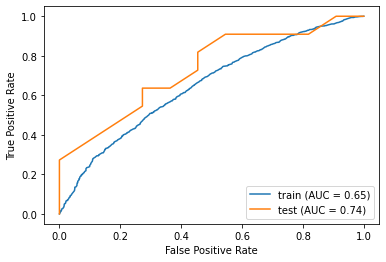

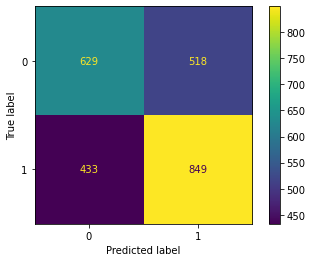

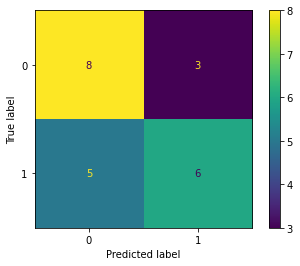

In [38]:
predictions, probabilities=logreg(X_train_best_log,X_test_best_log,y_train,y_test)

In [39]:
new_acc(probabilities)

0.65

### Explore thresehold movement and other things

In [94]:
logregs=LogisticRegression()
logregs.fit(X_train_scaled,y_train)

LogisticRegression()

In [95]:
logregs.predict_proba(X_test_scaled)[:,1] >= 0.6

array([ True,  True,  True,  True, False,  True, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False, False, False, False])

In [47]:
decisions = (logregs.predict_proba(X_test_scaled) >= .6).astype(int)
len(decisions)

54

In [97]:
today_winners = np.where(y_test!= predictions,'Away','Home')

In [101]:
today_winners

array(['Home', 'Home', 'Home', 'Home', 'Away', 'Home', 'Home', 'Away',
       'Away', 'Away', 'Home', 'Home', 'Away', 'Home', 'Home', 'Home',
       'Away', 'Home', 'Away', 'Away', 'Home', 'Away', 'Home'],
      dtype='<U4')

7 out of 9 playoff series correctly predicted

# KNN

### Home win KNN

Number of Neighbors: 17
Metric: minkowski
Weights: uniform
Mean Cross-Val Score: 0.5049382716049383
Train Mean Accuracy: 0.5594059405940595
Test Mean Accuracy: 0.6666666666666666
Recall Score: 0.75
Precision Score: 0.631578947368421
F1 score: 0.6857142857142857


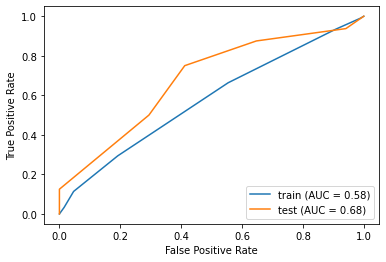

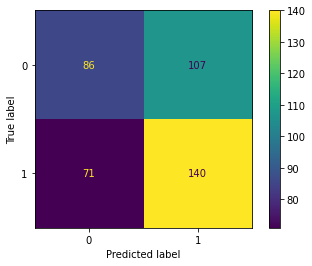

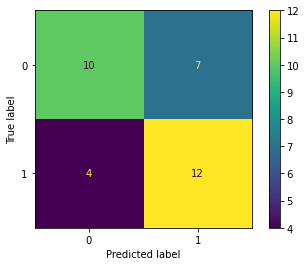

In [28]:
prediction,probabilities=knn(X_train_scaled,X_test_scaled,y_train,y_test)

In [29]:
probabilities

array([[0.23529412, 0.76470588],
       [0.58823529, 0.41176471],
       [0.64705882, 0.35294118],
       [0.52941176, 0.47058824],
       [0.52941176, 0.47058824],
       [0.52941176, 0.47058824],
       [0.47058824, 0.52941176],
       [0.35294118, 0.64705882],
       [0.64705882, 0.35294118],
       [0.52941176, 0.47058824],
       [0.47058824, 0.52941176],
       [0.58823529, 0.41176471],
       [0.47058824, 0.52941176],
       [0.47058824, 0.52941176],
       [0.41176471, 0.58823529],
       [0.41176471, 0.58823529],
       [0.41176471, 0.58823529],
       [0.58823529, 0.41176471],
       [0.41176471, 0.58823529],
       [0.41176471, 0.58823529],
       [0.58823529, 0.41176471],
       [0.52941176, 0.47058824],
       [0.41176471, 0.58823529],
       [0.47058824, 0.52941176],
       [0.47058824, 0.52941176],
       [0.41176471, 0.58823529],
       [0.41176471, 0.58823529],
       [0.52941176, 0.47058824],
       [0.41176471, 0.58823529],
       [0.41176471, 0.58823529],
       [0.

In [22]:
new_acc(probabilities)

0.75

# Decision Tree

In [24]:
dfeats= feature_select(X_train_scaled,y_train,DecisionTreeClassifier,min_features=10)
X_train_best_tree = X_train_scaled[dfeats]
X_test_best_tree = X_test_scaled[dfeats]

### Dtree Home Win

Max Depth: 3
Min Sample Split: 2
criterion: entropy
Mean Cross-Val Score: 0.5784319714903907
Train Mean Accuracy: 0.608480856319473
Test Mean Accuracy: 0.5909090909090909
Recall Score: 0.5454545454545454
Precision Score: 0.6
F1 score: 0.5714285714285713


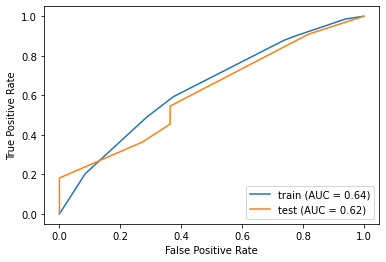

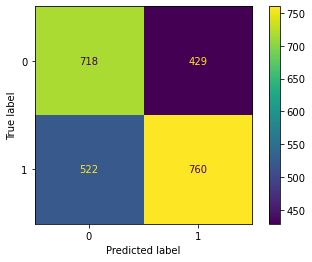

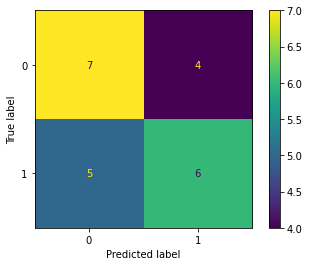

In [25]:
predictions,probabilities=dtree(X_train_best_tree,X_test_best_tree,y_train,y_test)

In [27]:
new_acc(probabilities)

0.5833333333333334

# Random Forest

In [23]:
rfeats= feature_select(X_train_scaled,y_train,RandomForestClassifier,min_features=10)
X_train_best_for = X_train_scaled[rfeats]
X_test_best_for = X_test_scaled[rfeats]

Number of Trees: 150
criterion: gini
Mean Cross-Val Score: 0.43320987654320986
Train Mean Accuracy: 0.5792079207920792
Test Mean Accuracy: 0.6363636363636364
Recall Score: 0.875
Precision Score: 0.5833333333333334
F1 score: 0.7000000000000001


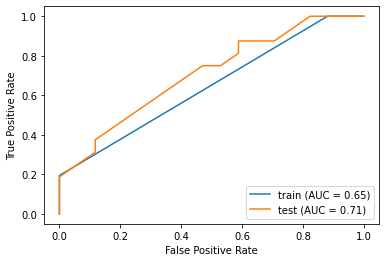

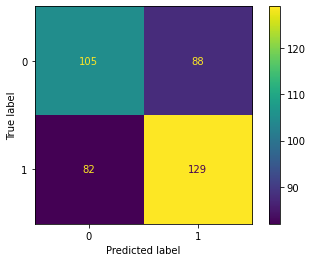

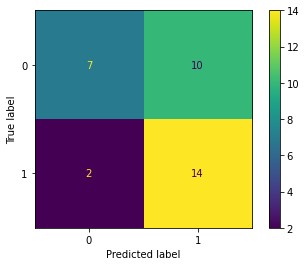

In [24]:
predictions,probabilities=random_forest(X_train_best_for,X_test_best_for,y_train,y_test)

In [26]:
new_acc(probabilities)

1.0

# Bagging Classifier

Dec Tree Max Depth: 2
Dec Tree Criterion: gini
Bagging Max Samples: 3
Bag Max Features: 2
# of Base Estimators: 500
Mean Cross-Val Score: 0.5891468329727207
Train Mean Accuracy Score: 0.5673116508851379
Test Mean Accuracy Score: 0.5
Recall Score: 1.0
Precision Score: 0.5
F1 score: 0.6666666666666666


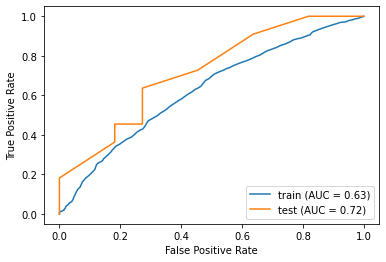

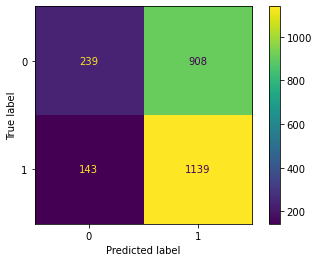

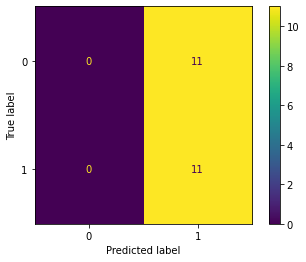

In [53]:
bagged(X_train_scaled,X_test_scaled,y_train,y_test)

# XGBoost

In [56]:
xfeats= feature_select(zero_imp_train,y_train,XGBClassifier,min_features=10)
X_train_best_x = zero_imp_train[xfeats]
X_test_best_x = zero_imp_test[xfeats]

XGBoost Learning Rate: 0.05
XGBoost Max Depth: 3
XGBoost Min Child Weight: 1
XGBoost Subsample: 0.7
XGBoost Estimators: 100
Stopped in Round: 15
Mean Cross-Val Score: 0.5409766238174027
Train Mean Accuracy Score: 0.6990531082750103
Test Mean Accuracy Score: 0.6363636363636364
Recall Score: 0.6363636363636364
Precision Score: 0.6363636363636364
F1 score: 0.6363636363636364


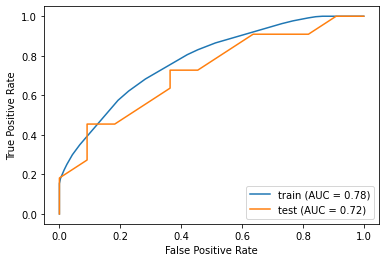

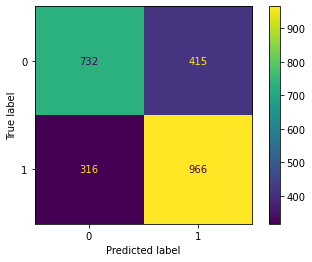

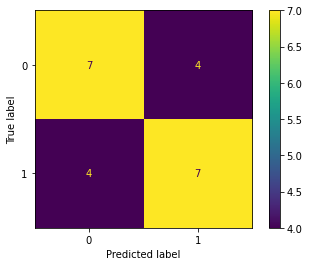

In [57]:
xgboost(X_train_best_x, X_test_best_x, y_train, y_test, cv=5)